Total Promotional Word Count: 342
Venue with the highest average num_sold: 239750 with an average of 959.0
Overall average num_sold: 26.529542695265075
Average num_sold for PromotionalWordCount = 0: 25.023717948717948
Average num_sold for PromotionalWordCount > 0: 53.42748091603053


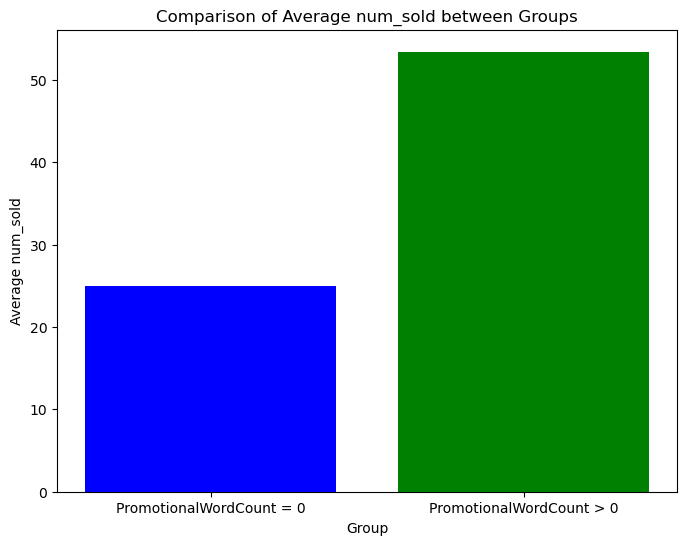

In [7]:
import pandas as pd

# Load the data
df = pd.read_excel('/Users/kritsadakruapat/Desktop/mainTable/edited/JoinAndDropDup.xlsx')

# Drop duplicates based on the 'Post_ID_post' column
df.drop_duplicates(subset=['Post_ID_post'], inplace=True)

# Add the new column 'usePromoWord'
df['usePromoWord'] = df['PromotionalWordCount'] > 0

# 1. Count all instances of PromotionalWordCount
total_promotional_word_count = df['PromotionalWordCount'].sum()
print(f"Total Promotional Word Count: {total_promotional_word_count}")

# 2. Find the venue with the highest average num_sold
avg_num_sold_per_venue = df.groupby('venue')['num_sold'].mean()
max_avg_num_sold_venue = avg_num_sold_per_venue.idxmax()
max_avg_num_sold_value = avg_num_sold_per_venue.max()
print(f"Venue with the highest average num_sold: {max_avg_num_sold_venue} with an average of {max_avg_num_sold_value}")

# 3. Find the maximum average num_sold overall
overall_max_avg_num_sold = df['num_sold'].mean()
print(f"Overall average num_sold: {overall_max_avg_num_sold}")

# 4. Compare between two groups: PromotionalWordCount = 0 and PromotionalWordCount > 0
group_zero_promotional = df[df['PromotionalWordCount'] == 0]
group_nonzero_promotional = df[df['PromotionalWordCount'] > 0]

avg_num_sold_zero_promotional = group_zero_promotional['num_sold'].mean()
avg_num_sold_nonzero_promotional = group_nonzero_promotional['num_sold'].mean()

print(f"Average num_sold for PromotionalWordCount = 0: {avg_num_sold_zero_promotional}")
print(f"Average num_sold for PromotionalWordCount > 0: {avg_num_sold_nonzero_promotional}")

# Plotting the comparison
import matplotlib.pyplot as plt

labels = ['PromotionalWordCount = 0', 'PromotionalWordCount > 0']
avg_num_sold_values = [avg_num_sold_zero_promotional, avg_num_sold_nonzero_promotional]

plt.figure(figsize=(8, 6))
plt.bar(labels, avg_num_sold_values, color=['blue', 'green'])
plt.xlabel('Group')
plt.ylabel('Average num_sold')
plt.title('Comparison of Average num_sold between Groups')
plt.show()

In [10]:
# Define the encoding columns
df['encode_canSoldTrue'] = df['CanSold'].apply(lambda x: 1 if x else 0)
df['encode_canSoldFalse'] = df['CanSold'].apply(lambda x: 0 if x else 1)

df.to_excel('ComparePromotionalWordWithNone.xlsx', index=False)